In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from os import path
from wordcloud import (WordCloud, get_single_color_func)

In [2]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [3]:
# Neurosynth result

ASD1_TD = {'sensorimotor': 0.605,'somatosensory': 0.660,'default' : 0.600, 'memory retrieval' : 0.510, 'mind' : 0.383, 'object': 0.374,'speech' : 0.349,'recognition' : 0.301,'autobiographical memory' : 0.289, 
                  'visual' : 0.260,  'face': 0.257,'mentalizing' : 0.237, 'hand' : 0.119,'foot' : 0.108,'finger' : 0.102,'category' : 0.1,'movement' : 0.227,'resting' : 0.226,'social' : 0.107,'beliefs' : 0.098}                  

ASD2_TD = {'categories' : 0.524,'face' : 0.390, 'word form' : 0.366, 'controls' : 0.304,'recognition' : 0.291, 'motor' : 0.282,'object' : 0.270, 'judgment' : 0.231, 'visual' : 0.216, 'auditory' : 0.180,
                  'selective' : 0.168,'reading' : 0.174, 'written' : 0.136,'color' : 0.102,'characters' : 0.108,'memory' : 0.199,'resting state' : 0.074,'emotion' : 0.073,'social' : 0.021,'vocal' : 0.021}

ASD3_TD = {'temporal' : 0.529,'sulcus sts' : 0.514,'auditory' : 0.389,'occipital' : 0.356,'speech' : 0.274,'speaker' : 0.210,'language' : 0.200,'visual' : 0.198,'sound' : 0.117,'letter' : 0.110,
                  'attention' : 0.105,'facial expression' : 0.100,'expression' : 0.068,'word' : 0.058,'perceptual' : 0.05,'charactor' : 0.044,'fusiform' : 0.037,'social' : 0.034,'object' : 0.033,'read' : 0.026}



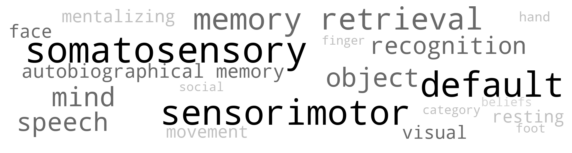

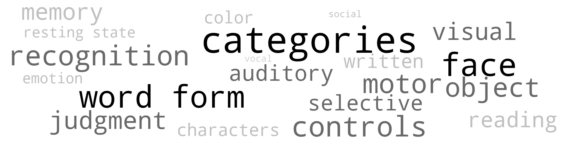

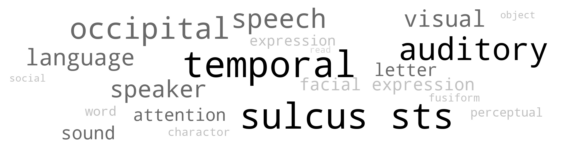

In [4]:
# Generate a word cloud image
# colormap_list = ['Greys', 'gist_yarg', 'gist_gray', 'gray', 'binary', 'gist_yarg']
for i,x in enumerate([ASD1_TD, ASD2_TD, ASD3_TD]):    
    wordcloud = WordCloud(max_font_size=130, prefer_horizontal = 1, width = 2000, height = 500, background_color = 'white', colormap=None).generate_from_frequencies(x)
    
    color_to_words  = {'black' : list(x.keys())[:3],
                   'dimgrey' : list(x.keys())[3:11],
                   'silver' : list(x.keys())[11:19],
                   'lightgray' : list(x.keys())[19:]}
    default_color = 'white'
    
    grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
    wordcloud.recolor(color_func=grouped_color_func)


    # Display the generated image:
    # the matplotlib way:
    plt.figure(i, (10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
